# Homework 3
Investigate how correlation between predictors in a linear model affects the variance of the coefficient estimates.

1. Simulate observations followng the linear model $Y = X_{1} + X_{2} + \epsilon$ where $\epsilon \sim N(0, 1)$. Let $\epsilon$ be independent of $X_{1}$ and $X_{2}$, and let $X_{1}$ and $X_{2}$ be drawn from an $N(0, [[1, \rho], [\rho, 1]])$ multivariate normal distribution, where $\rho$ is the correlation between $X_{1}$ and $X_{2}$. Use `scipy` for simulation.
2. Fit a linear model using `sklearn.linear_model.LinearRegression.` Store the fitted $X_{1}$ coefficient.
3. Repeat steps 1 and 2 to get multiple estimates of the $X_{1}$ coefficient. Then calculate and store the variance of the estimates.
4. Repeat steps 1 to 3 for a variety of values of $\rho$ in the interval $[-1, 1]$.
5. Plot $\rho$ versus the variance of the estimates.
6. State the trend in the plot and explain why it occurs.

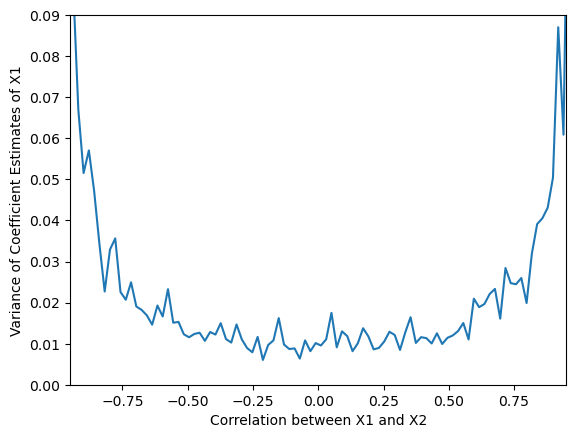

In [37]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import norm as gaussian
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
def func(rho):
    e=gaussian.rvs(0,1,100) 
    lst=[]
    for j in range (0,100):
        X1=[]
        X2=[]
        y=[]
        Xval=multivariate_normal.rvs([0,0], [[1,rho],[rho,1]],size=100)
        for i in range(0,len(Xval)):
            X1.append(Xval[i][0])
            X2.append(Xval[i][1])
        for k in range(0,100):
            y.append(X1[k]+X2[k]+e[k])
        reg = LinearRegression().fit(pd.DataFrame(Xval), pd.DataFrame(y))
        lst.append(reg.coef_[0][0])
    return(np.var(lst))
#rho = [-1,-0.5,0,0.5,1]
rho=np.linspace(-1,1,100)
var=[]
for w in rho:
    var.append(func(w))
plt.plot(rho,var)
plt.ylabel("Variance of Coefficient Estimates of X1")
plt.xlabel("Correlation between X1 and X2")
plt.xlim(-0.95,0.95)
plt.ylim(0,0.09)
plt.show()

### Explanation: 

From the plot, we can see that weaker correlation between X1 and X2 leads to lower variance of the coefficient estimates of X1, while stronger correlation leads to higher variance, especially when correlation is close to 1 or -1, the variance is at its highest. Here, "weak" means the absolute value of correlation between X1 and X2 is close to 0.